# Minigrad Demo

In [1]:
import csv
import matplotlib.pyplot as plt
import random

import neural
from value import Value

#### First, we load the dataset into arrays.

The final value is the price of the wine, and we load this into our Y array.
The rest of them are data that we will use to predict the rating, we load these into our X array.

In [2]:
# Load dataset

def load_data(file_name):
    result_x = []
    result_y = []
    with open(file_name) as file:
        reader = csv.reader(file)
        next(reader)

        for row in reader:
            x = []
            y = []

            for i in range(len(row)):
                if i == 2:
                    if row[i] == 'Yes':
                        x.append(1)
                    else:
                        x.append(0)
                elif i == len(row)-1:
                    y.append(float(row[i]))
                else:
                    x.append(float(row[i]))
            
            result_x.append(x)
            result_y.append(y)
    
    return result_x, result_y

X, Y = load_data('datasets/Student_Performance.csv')

In [3]:
# Print the size and first 5 elements of dataset
print(len(X))
for i in range(5): print(X[i], Y[i])

10000
[7.0, 99.0, 1, 9.0, 1.0] [91.0]
[4.0, 82.0, 0, 4.0, 2.0] [65.0]
[8.0, 51.0, 1, 7.0, 2.0] [45.0]
[5.0, 52.0, 1, 5.0, 2.0] [36.0]
[7.0, 75.0, 0, 8.0, 5.0] [66.0]


#### Architecture

We use multilayer perceptron with an input size of 5 and output size of 1, for each input feature and the single score output.
Each hidden layer will have a relu activation, and the output will be linear

The network will output a float value, and we will use it to find the predicted score.

In [4]:
mlp = neural.MLP(input_size=5, layer_sizes=[16, 8, 1], seed=None, inner_activation='leaky_relu', final_activation='linear')
print(mlp)

MLP(input_size=5, layer_sizes=[16, 8, 1])


In [5]:
# Get the parameters

param = mlp.parameters()
print(param[:5])
print(len(param))

[Value(data=-0.7013231124307862, grad=0), Value(data=0.8876073283211705, grad=0), Value(data=0.72910139244291, grad=0), Value(data=0.3259661040192585, grad=0), Value(data=0.2842664349098558, grad=0)]
241


Before we train our MLP, we will split the dataset into training and test sets, so we can evaluate the performance after running gradient descent

In [6]:
# Split data

train, test = neural.train_test_split(list(zip(X, Y)), 0.8, shuffle=False)

X_train = [i[0] for i in train]
Y_train = [i[1] for i in train]

X_test = [i[0] for i in test]
Y_test = [i[1] for i in test]

print(len(X_train), len(Y_test))
for i in range(5): print(X_train[i], Y_train[i])

8000 2000
[7.0, 99.0, 1, 9.0, 1.0] [91.0]
[4.0, 82.0, 0, 4.0, 2.0] [65.0]
[8.0, 51.0, 1, 7.0, 2.0] [45.0]
[5.0, 52.0, 1, 5.0, 2.0] [36.0]
[7.0, 75.0, 0, 8.0, 5.0] [66.0]


In [7]:
# For graphing purposes
cost_history = []

iterations = 250
learning_rate = 0.000000001
lambda_ = 0.01
batch_size = 1000

for i in range(iterations):
    if batch_size != 0:
        random.seed()
        random.shuffle(train)
        X_batch = [train[i][0] for i in range(batch_size)]
        Y_batch = [train[i][1] for i in range(batch_size)]
    else:
        X_batch = X_train[:100]
        Y_batch = Y_train[:100]

    cost = mlp.cost(X_batch, Y_batch, lambda_)  
    cost.backward()

    if i%10 == 0:
        print(i, cost)
        cost_history.append(cost)
    
    alpha = learning_rate

    for p in param:
        p.data -= alpha*p.grad

0 Value(data=27421240.31439717, grad=1)
10 Value(data=6122850.80241145, grad=1)
20 Value(data=1476521.5397269425, grad=1)
30 Value(data=406532.46065531136, grad=1)
40 Value(data=138251.22360664565, grad=1)
50 Value(data=79105.31876991078, grad=1)
60 Value(data=71338.55918349331, grad=1)
70 Value(data=65990.53620952921, grad=1)
80 Value(data=68921.79663070063, grad=1)
90 Value(data=68080.30121800449, grad=1)
100 Value(data=63404.30267919832, grad=1)
110 Value(data=61600.249377792374, grad=1)
120 Value(data=66954.07974368284, grad=1)
130 Value(data=70324.84990270234, grad=1)
140 Value(data=65761.01457980736, grad=1)
150 Value(data=65993.85022452385, grad=1)
160 Value(data=67895.3088753908, grad=1)
170 Value(data=68461.467997578, grad=1)
180 Value(data=67582.61266244495, grad=1)
190 Value(data=62676.53929809706, grad=1)
200 Value(data=65745.34735794821, grad=1)
210 Value(data=68405.81366472722, grad=1)
220 Value(data=67127.73531286449, grad=1)
230 Value(data=63353.32334236115, grad=1)
240

In [8]:
predictions = mlp(X_test)
print(mlp.cost(X_test, Y_test))
for i in range(10): print(predictions[i], Y_test[i])

Value(data=134322.78875092164, grad=0)
[Value(data=41.273056751840194, grad=0)] [28.0]
[Value(data=40.96345820889613, grad=0)] [35.0]
[Value(data=61.140712731185886, grad=0)] [63.0]
[Value(data=71.00255565674595, grad=0)] [71.0]
[Value(data=71.29849432332313, grad=0)] [78.0]
[Value(data=33.99635454596769, grad=0)] [32.0]
[Value(data=29.257529019479602, grad=0)] [40.0]
[Value(data=55.574722360863944, grad=0)] [55.0]
[Value(data=46.308835521088774, grad=0)] [42.0]
[Value(data=75.51861771502143, grad=0)] [88.0]


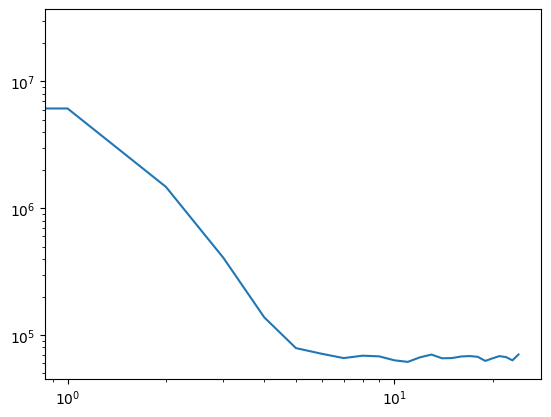

In [9]:
# Graph cost over time

cost_history = [c.data for c in cost_history]
plt.plot(cost_history)
plt.yscale('log')
plt.xscale('log')